In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [27]:
 #sklearn preproc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [28]:
data_index=pd.read_csv('../data/out_csv/index_Mexico.csv')

In [29]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-03-19,0.016734,0.006086,0.0,164.0,46.0,1.0,1.0,0.015559,0.0,0.0,0.0,0.0
1,2020-03-20,0.016734,0.006086,0.0,203.0,39.0,2.0,1.0,0.015559,0.0,0.0,0.0,0.0
2,2020-03-21,0.024452,0.018237,0.0,251.0,48.0,2.0,0.0,0.022753,0.0,0.0,0.0,0.0
3,2020-03-22,0.024452,0.018237,0.0,316.0,65.0,3.0,1.0,0.022753,0.0,0.0,0.0,0.0
4,2020-03-23,0.039888,0.042559,0.0,367.0,51.0,4.0,1.0,0.037117,0.0,0.0,0.0,0.0


In [30]:
data_index=data_index.set_index('date')

In [31]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-29,0.101655,0.139872,0.0,993.0,145.0,20.0,4.0,0.094573,0.0,0.0,...,16.0,12.0,8.0,6.0,5.0,4.0,3.0,2.0,2.0,1.0
2020-03-30,0.127404,0.180417,0.0,1094.0,101.0,28.0,8.0,0.118498,0.0,0.0,...,20.0,16.0,12.0,8.0,6.0,5.0,4.0,3.0,2.0,2.0
2020-03-31,0.127404,0.180417,0.0,1215.0,121.0,29.0,1.0,0.118498,0.0,0.0,...,28.0,20.0,16.0,12.0,8.0,6.0,5.0,4.0,3.0,2.0
2020-04-01,0.127404,0.180417,0.0,1378.0,163.0,37.0,8.0,0.118498,0.0,0.0,...,29.0,28.0,20.0,16.0,12.0,8.0,6.0,5.0,4.0,3.0
2020-04-02,0.127404,0.180417,0.0,1510.0,132.0,50.0,13.0,0.118498,0.0,0.0,...,37.0,29.0,28.0,20.0,16.0,12.0,8.0,6.0,5.0,4.0


In [32]:
data_index=data_index.fillna(0)

In [33]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-29,0.101655,0.139872,0.0,993.0,145.0,20.0,4.0,0.094573,0.0,0.0,...,16.0,12.0,8.0,6.0,5.0,4.0,3.0,2.0,2.0,1.0
2020-03-30,0.127404,0.180417,0.0,1094.0,101.0,28.0,8.0,0.118498,0.0,0.0,...,20.0,16.0,12.0,8.0,6.0,5.0,4.0,3.0,2.0,2.0
2020-03-31,0.127404,0.180417,0.0,1215.0,121.0,29.0,1.0,0.118498,0.0,0.0,...,28.0,20.0,16.0,12.0,8.0,6.0,5.0,4.0,3.0,2.0
2020-04-01,0.127404,0.180417,0.0,1378.0,163.0,37.0,8.0,0.118498,0.0,0.0,...,29.0,28.0,20.0,16.0,12.0,8.0,6.0,5.0,4.0,3.0
2020-04-02,0.127404,0.180417,0.0,1510.0,132.0,50.0,13.0,0.118498,0.0,0.0,...,37.0,29.0,28.0,20.0,16.0,12.0,8.0,6.0,5.0,4.0


Text(0.5, 0, 'Date')

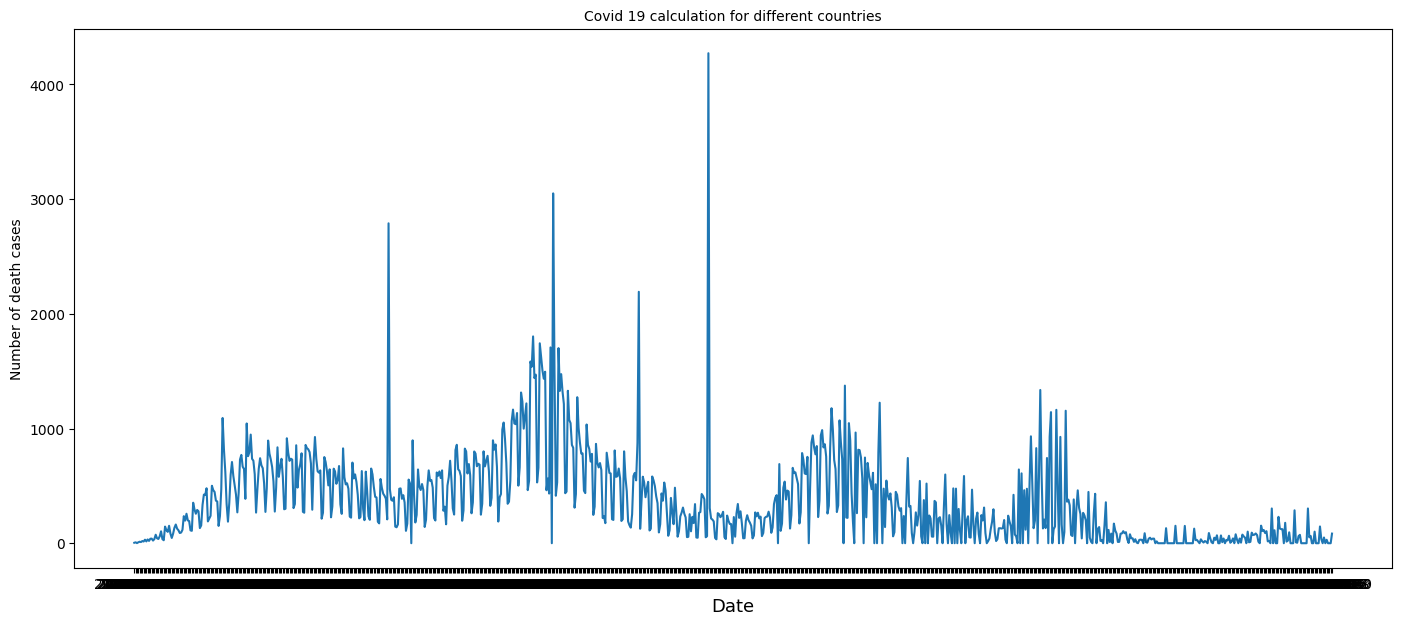

In [34]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

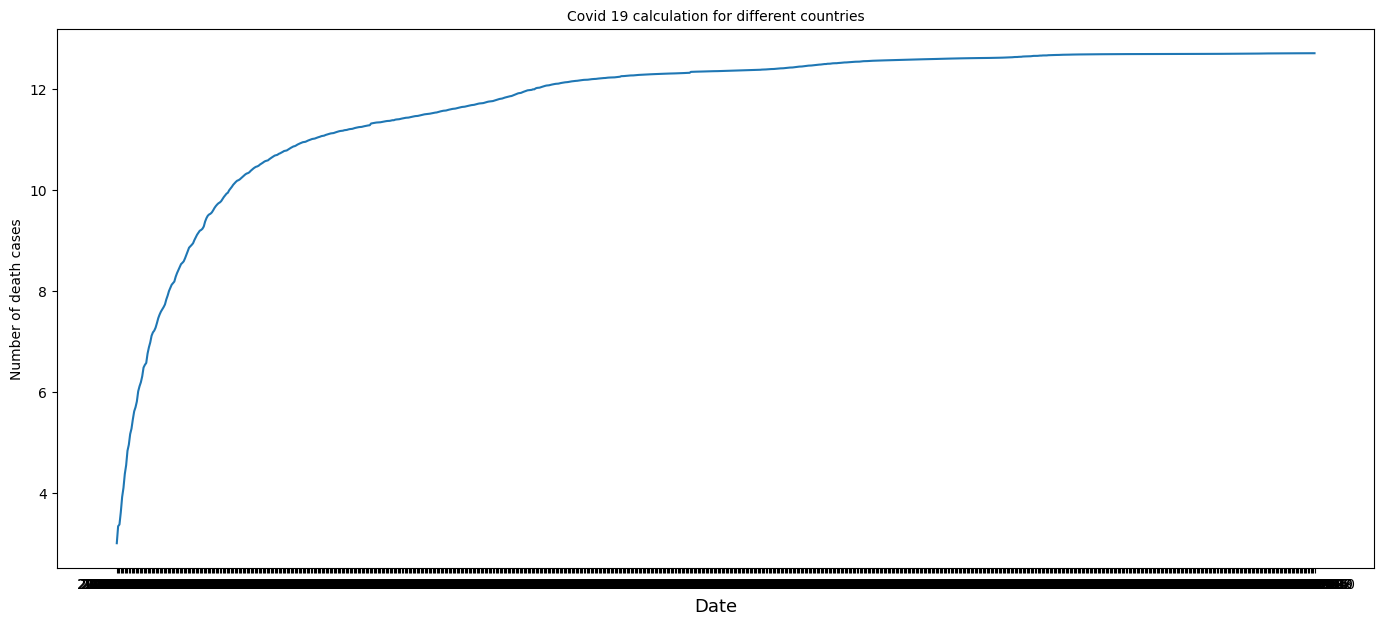

In [35]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index[:925],np.log(data_index['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

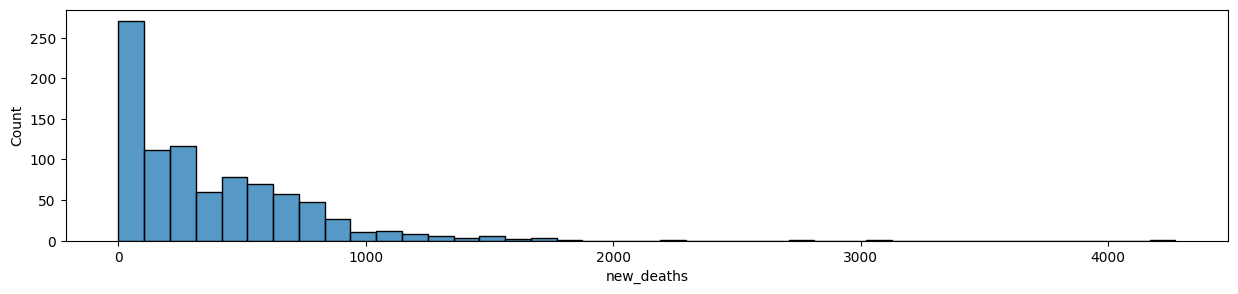

In [36]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [37]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

## scaling data

In [43]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [44]:
n = len(X)
X_train = X[0:int(n-50)]
X_test=X[int(n-50):]
y_train=y[0:int(n-50)]
y_test=y[int(n-50):]

# Model

In [40]:
model =SVR(C=6, coef0=10, epsilon=0.05, kernel='poly', gamma='scale')

In [41]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=10, degree=3, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=10, degree=3, kernel=poly; total time=   0.0s
[CV] END ................C=5, coef0=10, degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=10, degree=8, kernel=poly; total time= 1.7min
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   1.3s
[CV] END ................C=5

## fitting the model for train and test set

In [22]:
model.fit(X_train,y_train)

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

## prediction

In [23]:
y_pred=model.predict(X_test)

## evaluating model performance

In [24]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.010140424538306072

Text(0.5, 0, 'Date')

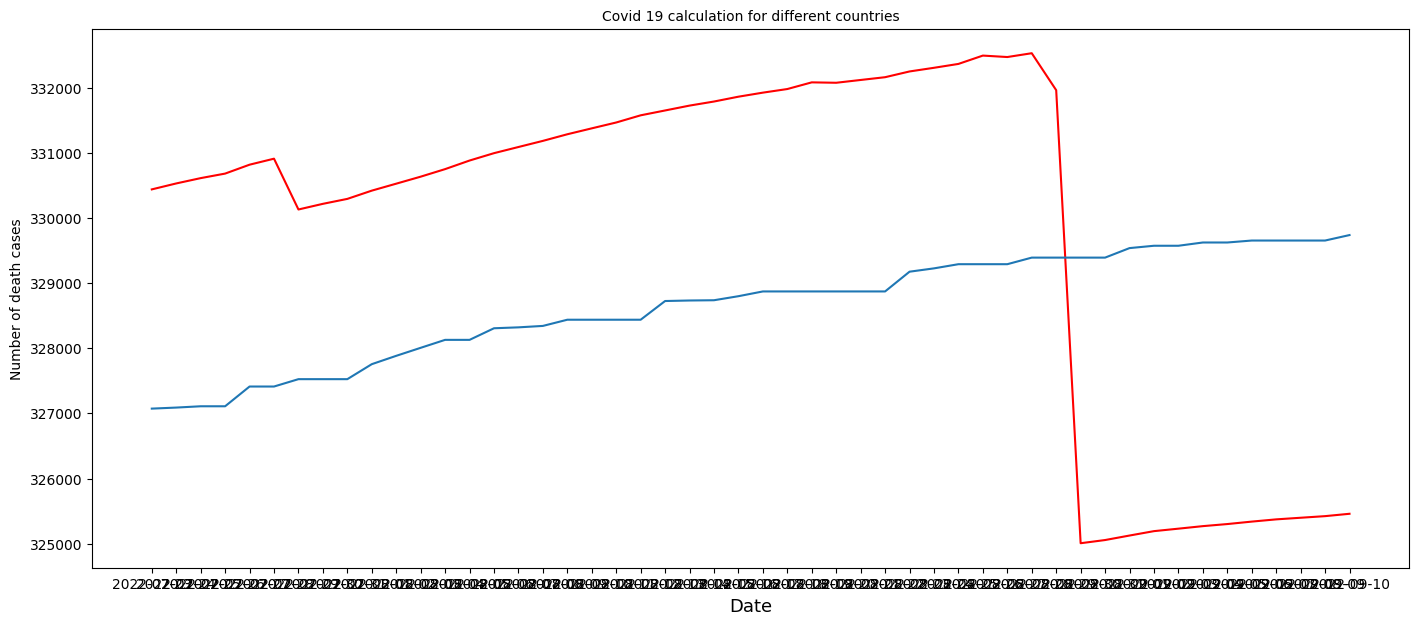

[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=3, kernel=poly; total time=   0.1s
[CV] END ...............C=5,

In [26]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index,y_pred,color='r');
plt.plot(y_test.index,y_test);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)